# Задание 1. "Естественность" языка

Одной из важных задач в NLP является оценка качества сгенерированного текста.
Одной из самых распорстранённых является [перплексия](https://habr.com/ru/companies/wunderfund/articles/580230/). Такой подход является классическим, существует целый ряд идейно близких метрик.

Сейчас же появляются метрики, которые не просто "для нейросетей", они сами являются нейросетями. Одни из характерных представителей - [RuCoLa](https://habr.com/ru/articles/667336/). Это целый проект, со своим API и [лидербордом](https://rucola-benchmark.com/leaderboard).

Подобные рейтинги, кстати, позволяют нам выбирать модели под наши задачи.

Это модель, обученная на тщательно отобранных лингвистами вручную предложений, которая производит бинарную классификацию: *преемлемо* или *непреемлемо*.

Загрузите [датасет](https://github.com/RussianNLP/RuCoLA) RuCoLA и импортируйте модель "RussianNLP/ruRoBERTa-large-rucola" для пайплайна "text-classification".

Задачи следующие:

* Построить "ящики с усами" по перплексии и по метрике RuCoLa (ниже она написана)
* Аугментируйте предложения с помощью библиотек для аугментации текстов
* Постройте "ящики с усами" по аугментированным данным.
* Сравните по паре предложений с самымими худших, самыми лучшими и пограничными значениями метрик.
* По какой метрике вы будете делать выбор?

**Дополнительно**
* Представьте, что вам необходимо выбрать готовую модель-генератор на русском языке. Какую вы выберете? Как вы строго обоснуете свой выбор?

Возможно, у вас будет несколько кандидатов и вы решите их как-то сравнить.

In [ ]:
!pip install transformers

import numpy as np
import pandas as pd
import torch

#warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def rucola_metric(res):
  num = 0
  for i in range(len(res)):
    if res[i]['label'] == 'LABEL_1':
      num += res[i]['score']
    else:
      num -= res[i]['score']
  return num / len(res)

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model = "RussianNLP/ruRoBERTa-large-rucola")

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

In [ ]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
help(classifier)

Help on TextClassificationPipeline in module transformers.pipelines.text_classification object:

class TextClassificationPipeline(transformers.pipelines.base.Pipeline)
 |  TextClassificationPipeline(**kwargs)
 |  
 |  Text classification pipeline using any `ModelForSequenceClassification`. See the [sequence classification
 |  examples](../task_summary#sequence-classification) for more information.
 |  
 |  Example:
 |  
 |  ```python
 |  >>> from transformers import pipeline
 |  
 |  >>> classifier = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")
 |  >>> classifier("This movie is disgustingly good !")
 |  [{'label': 'POSITIVE', 'score': 1.0}]
 |  
 |  >>> classifier("Director tried too much.")
 |  [{'label': 'NEGATIVE', 'score': 0.996}]
 |  ```
 |  
 |  Learn more about the basics of using a pipeline in the [pipeline tutorial](../pipeline_tutorial)
 |  
 |  This text classification pipeline can currently be loaded from [`pipeline`] using the following task identifier

In [ ]:
text1 = classifier(["Оранжевый закат на небе был прекрасным зрелищем.",
            "Фиолетовые облака лениво текла вниз, словно медленно текущий река.",
            "На земле лежали розовые облака, создавая необыкновенно красивое зрелище.",
            "Все вокруг было наполнено приятной атмосферой, которая заставляла задуматься о том, как прекрасна природа и как важно любить и беречь ее."])

In [ ]:
rucola_metric(text1)

0.4871343970298767

In [ ]:
text2 = classifier(["Однажды вечером я решил приготовить борщ.",
            "Я купил все необходимое ингредиенты и начал готовить.",
            "Через несколько часов борщ готовился, и я решил приготовить блины и пельмени.",
            "Я начал приготавливать блины, используя те же ингредиенты, что и для борща.",
            "Я добавил муку, яйца, молоко, соль и перец, и смешал все вместе.",
            "Затем я выложил тесто в форму и выпекал блины.",
            "После того, как блины готовы, я начал приготавливать пельмени.",
            "Я добавил муку, яйца, молоко и соль, и смешал все вместе.",
            "Затем я выложил тесто в формы и выпекал пельмени.",
            "Когда борщ, блины и пельмени готовы, я подал все хзвместе на стол.",
             "Мы наслаждались вкусным борщем, блинами и пельменами.",
            "Это было настоящее удовольствие!"])

In [ ]:
rucola_metric(text2)

0.04047214984893799

In [ ]:
real_text = classifier([
 'Привет, любимая.',
 'Как дела?',
 'Что делаешь?',
 'Я сейчас в метро, еду на урок русского языка.',
 'Он начинается в 8:30.',
 'Обычно я езжу на урок на метро.',
 'Метро - очень популярный вид транспорта в Москве, потому что в городе всегда пробки.',
 'Ты знаешь, что значит слово «пробка»?',
 'По-русски «пробка» - это когда на улице все машины стоят и не едут.',
 'А ещё пробка есть в бутылке.',
 'В метро всегда много народу и очень шумно.',
 'Но оно очень красивое, как музей.',
 'И ещё оно быстрое и удобное.'])

In [ ]:
real_text

[{'label': 'LABEL_1', 'score': 0.99050372838974},
 {'label': 'LABEL_1', 'score': 0.9974937438964844},
 {'label': 'LABEL_1', 'score': 0.995926022529602},
 {'label': 'LABEL_1', 'score': 0.9944104552268982},
 {'label': 'LABEL_1', 'score': 0.9927616715431213},
 {'label': 'LABEL_1', 'score': 0.9967597126960754},
 {'label': 'LABEL_0', 'score': 0.9188284873962402},
 {'label': 'LABEL_1', 'score': 0.9975433945655823},
 {'label': 'LABEL_1', 'score': 0.9933651089668274},
 {'label': 'LABEL_1', 'score': 0.9764190912246704},
 {'label': 'LABEL_1', 'score': 0.9939898252487183},
 {'label': 'LABEL_1', 'score': 0.9937877655029297},
 {'label': 'LABEL_1', 'score': 0.9942704439163208}]

In [ ]:
list_of_scores = []
for i in range(len(real_text)):
    list_of_scores.append(real_text[i]['score'])
list_of_scores

[0.99050372838974,
 0.9974937438964844,
 0.995926022529602,
 0.9944104552268982,
 0.9927616715431213,
 0.9967597126960754,
 0.9188284873962402,
 0.9975433945655823,
 0.9933651089668274,
 0.9764190912246704,
 0.9939898252487183,
 0.9937877655029297,
 0.9942704439163208]

In [ ]:
rucola_metric(real_text)

0.84603095971621

Воспользуемся метрикой [перплексия](https://habr.com/ru/companies/wunderfund/articles/580230/)

In [ ]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch
import numpy as np

model_name = 'cointegrated/rubert-tiny'
model = AutoModelForMaskedLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def score(model, tokenizer, sentence):
    tensor_input = tokenizer.encode(sentence, return_tensors='pt')
    repeat_input = tensor_input.repeat(tensor_input.size(-1)-2, 1)
    mask = torch.ones(tensor_input.size(-1) - 1).diag(1)[:-2]
    masked_input = repeat_input.masked_fill(mask == 1, tokenizer.mask_token_id)
    labels = repeat_input.masked_fill( masked_input != tokenizer.mask_token_id, -100)
    with torch.inference_mode():
        loss = model(masked_input, labels=labels).loss
    return np.exp(loss.item())

print(score(sentence='London is the capital of Great Britain.', model=model, tokenizer=tokenizer))
print(score(sentence='London is the capital of South America.', model=model, tokenizer=tokenizer))

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

4.54125218839413
6.162017238332462


Возьмите любую библиотеку аугментации текстов из прошлой лекции и попортите датасет

In [ ]:
!pip install -q nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
real_text_list = ['Привет, любимая.',
 'Как дела?',
 'Что делаешь?',
 'Я сейчас в метро, еду на урок русского языка.',
 'Он начинается в 8:30.',
 'Обычно я езжу на урок на метро.',
 'Метро - очень популярный вид транспорта в Москве, потому что в городе всегда пробки.',
 'Ты знаешь, что значит слово «пробка»?',
 'По-русски «пробка» - это когда на улице все машины стоят и не едут.',
 'А ещё пробка есть в бутылке.',
 'В метро всегда много народу и очень шумно.',
 'Но оно очень красивое, как музей.',
 'И ещё оно быстрое и удобное.']

In [ ]:
list_perp = []
for i in range(len(real_text)):
    tmp = score(sentence=real_text_list[i], model=model, tokenizer=tokenizer)
    list_perp.append(tmp)
list_perp

[11.731526570384204,
 11.774401837854198,
 2.07685256459581,
 22.54502716578088,
 17.135231985959372,
 69.4547160466501,
 18.693131136270935,
 5.316012846773982,
 17.075656886076818,
 92.42206575300506,
 161.51754912126142,
 22.721362452587645,
 49.60509270439884]

In [ ]:
import nlpaug.augmenter.word as naw

augment = naw.SpellingAug()

augment = naw.ContextualWordEmbsAug(model_path="cointegrated/rubert-tiny2", action="insert")
augmented_real_text = augment.augment(real_text_list)

tokenizer_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

In [ ]:
augmented_real_text

['Но Привет, а любимая.',
 'Не Как дела?',
 '« Что делаешь?',
 'Я сейчас сижу в метро, еду уже на свой урок у русского языка.',
 'Сейчас Он начинается в возрасте 8 : 1 30.',
 'Обычно я даже езжу раз на профессиональный урок на метро.',
 'Сам Метро - очень популярный и вид транспорта в современной Москве, потому есть что в городе всегда и пробки.',
 'Ты ни знаешь, потому что значит слово « « пробка »?',
 'В По - русски « Восточная пробка было » - то это когда сейчас на улице все машины стоят сейчас и не едут.',
 'Вопрос А когда ещё пробка есть в пустой бутылке.',
 'В сети метро будет всегда много народу и очень часто шумно.',
 'Но как оно хорошо очень красивое, известное как музей.',
 'И ещё ли оно будет быстрое и более удобное.']

In [ ]:
augmented_real_text_cl = classifier(augmented_real_text)

In [ ]:
augmented_real_text_cl

[{'label': 'LABEL_0', 'score': 0.9831969738006592},
 {'label': 'LABEL_0', 'score': 0.731461763381958},
 {'label': 'LABEL_1', 'score': 0.9596959352493286},
 {'label': 'LABEL_0', 'score': 0.9943718910217285},
 {'label': 'LABEL_0', 'score': 0.9859498143196106},
 {'label': 'LABEL_0', 'score': 0.9333913922309875},
 {'label': 'LABEL_0', 'score': 0.9959218502044678},
 {'label': 'LABEL_0', 'score': 0.990186333656311},
 {'label': 'LABEL_0', 'score': 0.9954114556312561},
 {'label': 'LABEL_0', 'score': 0.9283315539360046},
 {'label': 'LABEL_0', 'score': 0.969199538230896},
 {'label': 'LABEL_0', 'score': 0.9920814037322998},
 {'label': 'LABEL_0', 'score': 0.989520788192749}]

In [ ]:
list_of_scores_aug = []
for i in range(len(augmented_real_text_cl)):
    list_of_scores_aug.append(augmented_real_text_cl[i]['score'])
list_of_scores_aug

[0.9831969738006592,
 0.731461763381958,
 0.9596959352493286,
 0.9943718910217285,
 0.9859498143196106,
 0.9333913922309875,
 0.9959218502044678,
 0.990186333656311,
 0.9954114556312561,
 0.9283315539360046,
 0.969199538230896,
 0.9920814037322998,
 0.989520788192749]

In [ ]:
list_perp_aug = []
for i in range(len(augmented_real_text)):
    tmp = score(sentence=augmented_real_text[i], model=model, tokenizer=tokenizer)
    list_perp_aug.append(tmp)
list_perp_aug

[41.41623140101991,
 651.8652667214785,
 6.480577974693491,
 17.720632405379952,
 37.76044265185236,
 73.3695398846613,
 46.947816308568605,
 10.606293726559002,
 37.174923755250354,
 116.03971184872715,
 64.23563241482144,
 27.26221559689931,
 29.512911697451187]

In [ ]:
# Your code here

Рассчитайте ящики с усами по обоим метрикам

<Axes: >

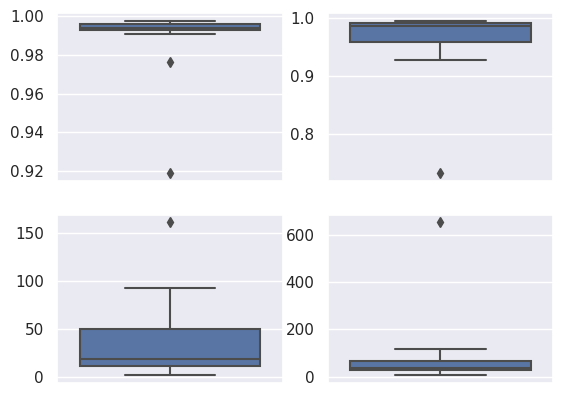

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(y=list_of_scores, ax=axes[0,0])
sns.boxplot(y=list_of_scores_aug, ax=axes[0,1])
sns.boxplot(y=list_perp, ax=axes[1,0])
sns.boxplot(y=list_perp_aug, ax=axes[1,1])

In [ ]:
# Your code here

## Формат результата

Получить "ящики с усами" метрик.

Предложить третью метрику.

Выбрать и обосновать количественно модель для генерации текста.

**Вывод: обе метрики работают не очень, однако способны ловить выбросы (предложения, которые абсолютно неадекватны с человеческой точки зрения). Я бы выбрал метрику рукола, поскольку, по-видимому, больше штрафует за кривые предложения**

# Задание 2. Классификация с помощью BERT

Возьмите набор данных эмоциональных окрасок отзывов [emotions dataset](https://huggingface.co/datasets/emotion). В датасете 5 классов. Получите эмбеддинг из BERT-подобного кодировщика (возьмите 3-4 разных), классифицируйте тексты с помощью методов ML или  нейростеи, использовав эмбеддинги в качестве входов.

Произведите fine-tuning кодировщика на ваших данных (классификатор на основе bert), и сравните, как изменилось качество классификации.

**Дополнительно**

* Попробуйте классифицировать, использовав такие методы, как TF-IDF, word2vec и другие.

* Попробуйте использовать косинусную меру для оценки близости текстов. Получается ли с её помощью разделять классы?

In [ ]:
!pip install -q transformers
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import torch
from datasets import load_dataset
import warnings

warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from IPython.display import clear_output

train = load_dataset("SetFit/emotion", split="train")
clear_output()
train_df = pd.DataFrame({"text": train["text"], "emotion": train["label"]})
train_df.head()

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
train_df['emotion'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: emotion, dtype: int64

Инициализация токенайзера и модели. Перед тем, как отправить текст в модель, его следует токенизировать.

**Учитывайте**, что:
* Выходы моделей могут отличаться (разные имена ключей словаря, разная вложенность, т.е. фантомные размерности).
* Длина эмбеддинга длинее 2048 в данной задаче не потребуется. А чем длинее эмбеддинг, тем медленнее всё будет учиться.


API токенизатора [BERT](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizer) (как пример).

Руководство по использованию бертов с [hugging face c towardsdatascience.com](https://towardsdatascience.com/how-to-use-bert-from-the-hugging-face-transformer-library-d373a22b0209).




Возьмите модель "rubert-tiny2" и соответствующий токенизатор

In [ ]:
# Your code here
!pip install transformers --progress-bar off

import torch
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertForSequenceClassification
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2", model_max_length=312)
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2").to(device)

tokenizer_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

In [ ]:
# подать векторы на рандом форест или бустинг

Посмотрим, как устроен датасет:

In [ ]:
# Your code here
print(len(train_df))

16000


Посмотрите на выходы модели:

https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward.returns

Среди них есть эмбеддинги в ключах: pooler_output и hidden_state

Попробуйте использовать один из них для классификации.

В данном задании достаточно использовать 5000 фраз (3000 train, 1000 val,1000 test).




In [ ]:
test = load_dataset("SetFit/emotion", split="test")
test_df = pd.DataFrame({"text": test["text"], "emotion": test["label"]})
test_df.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [ ]:
val = load_dataset("SetFit/emotion", split="validation")
val_df = pd.DataFrame({"text": val["text"], "emotion": val["label"]})
val_df.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [ ]:
X_train = train_df['text']
y_train = train_df['emotion']
X_val = val_df['text']
y_val = val_df['emotion']
X_test = test_df['text']
y_test = test_df['emotion']

Сохраните эмбеддинги модели и постройте поверх них классификатор.

In [ ]:
tokenized_train = tokenizer(X_train.values.tolist(), padding = True, truncation = True, return_tensors="pt")
tokenized_val = tokenizer(X_val.values.tolist() , padding = True, truncation = True,  return_tensors="pt")

print(tokenized_train.keys())

#move on device (GPU)
tokenized_train = {k:torch.tensor(v).to(device) for k,v in tokenized_train.items()}
tokenized_val = {k:torch.tensor(v).to(device) for k,v in tokenized_val.items()}

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [ ]:
with torch.no_grad():
  hidden_train = model(**tokenized_train) #dim : [batch_size(nr_sentences), tokens, emb_dim]
  hidden_val = model(**tokenized_val)

#get only the [CLS] hidden states
cls_train = hidden_train.last_hidden_state[:,0,:]
cls_val = hidden_val.last_hidden_state[:,0,:]

OutOfMemoryError: ignored

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
x_train = cls_train.to("cpu")
x_val = cls_val.to("cpu")

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_val_pred = rf.predict(x_val)

torch.Size([3000, 312]) (3000,) torch.Size([1000, 312]) (1000,)


In [ ]:
print(classification_report(y_val_pred, y_val.values))

              precision    recall  f1-score   support

           0       0.37      0.26      0.31       387
           1       0.60      0.34      0.44       610
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.31      1000
   macro avg       0.16      0.10      0.12      1000
weighted avg       0.51      0.31      0.39      1000



In [ ]:
# Your code here

Попробуйте дообучить BERT и произвести классификацию заново

In [ ]:
# Your code here

## Формат результата

Получить значение качества классификации

# Задание 3. Генерация текста

Возьмите произведение Гете "Фауст" и обучите на нем модель  генерации текста.

При обучении игнорируйте знаки препинания и номера страниц.

Используйте Hugging Face. Попробуйте разные параметры модели (например, разные режимы генерации). Как меняется результат?


In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

import random
import torch


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True


set_random_seed(42)

In [ ]:
!pip install -q -U transformers accelerate git+https://github.com/huggingface/peft.git datasets evaluate --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
try:
    import transformers
except ModuleNotFoundError:
    !pip install -q transformers[torch]

In [ ]:
import torch
import transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from IPython.display import clear_output

transformers.logging.set_verbosity_error()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

clear_output()

In [ ]:
!wget https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/Faust.txt


--2023-12-11 12:38:35--  https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/Faust.txt
Resolving edunet.kea.su (edunet.kea.su)... 51.158.190.138
Connecting to edunet.kea.su (edunet.kea.su)|51.158.190.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666546 (651K) [text/plain]
Saving to: ‘Faust.txt.3’

Faust.txt.3         100%[===================>] 650.92K   899KB/s    in 0.7s    

2023-12-11 12:38:37 (899 KB/s) - ‘Faust.txt.3’ saved [666546/666546]



In [ ]:
with open("Faust.txt") as text_file:
    faust_text = "".join(text_file.readlines())

In [ ]:
faust_text

'вы вновь со мной, туманные виденья,\nмне в юности мелькнувшие давно…\nвас удержу ль во власти вдохновенья?\nбылым ли снам явиться вновь дано?\nиз сумрака, из тьмы полузабвенья\nвосстали вы… о, будь, что суждено!\nкак в юности, ваш вид мне грудь волнует,\nи дух мой снова чары ваши чует.\nвы принесли с собой воспоминанье\nвеселых дней и милых теней рой;\nвоскресло вновь забытое сказанье\nлюбви и дружбы первой предо мной;\nвсе вспомнилось: и прежнее страданье,\nи жизни бег запутанной чредой,\nи образы друзей, из жизни юной\nисторгнутых, обманутых фортуной.\nкому я пел когда-то, вдохновенный,\nтем песнь моя – увы! – уж не слышна…\nкружок друзей рассеян по вселенной,\nих отклик смолк, прошли те времена.\nя чужд толпе со скорбью, мне священной,\nмне самая хвала ее страшна,\nа те, кому моя звучала лира,\nкто жив еще, – рассеяны средь мира.\nи вот воскресло давнее стремленье\nтуда, в мир духов, строгий и немой,\nи робкое родится песнопенье,\nстеня, дрожа эоловой струной;\nв суровом сердце тре

In [ ]:
f = open('Faust_1.txt','w')  # открытие в режиме записи
f.write(faust_text)  # запись в файл
f.close()  # закрытие файла

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from warnings import simplefilter

simplefilter("ignore", category=FutureWarning)

# Creating Dataset
train_dataset = TextDataset(tokenizer=tokenizer, file_path='Faust_1.txt', block_size=64)

# Сreating DataLoader (crop the text into optimal length pieces)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
training_args = TrainingArguments(
    output_dir="./finetuned",  # The output directory
    overwrite_output_dir=True,  # overwrite the content of the output directory
    num_train_epochs=2,  # number of training epochs
    per_device_train_batch_size=32,  # batch size for training
    per_device_eval_batch_size=32,  # batch size for evaluation
    warmup_steps=10,  # number of warmup steps for learning rate scheduler
    gradient_accumulation_steps=16,  # to make "virtual" batch size larger
)


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    optimizers=(
        torch.optim.AdamW(model.parameters(), lr=1e-5),
        None,
    ),  # Optimizer and learnig rate scheduler
)

In [ ]:
trainer.train()

KeyboardInterrupt: ignored

In [ ]:
# Probability sampling with limit example
text = "и в мире вся вражда станет \n"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
model.eval()
with torch.no_grad():
    out = model.generate(
        input_ids,
        do_sample=True,
        num_beams=2,
        temperature=1.5,
        top_p=0.9,
        max_length=100,
        pad_token_id=512,
    )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


и в мире вся вражда станет 
 против нас.
мы знаем, что будет, –
всяк будет сам себе врагом,
а я один буду всем врагом.
но, коль уж ты так близок к нам,
ты, может быть, и на стороне врага.
ты, кажется, хочешь с нами остаться?
да, но, видно, все же я не прав.
нет, что-то в тебе есть такое,
что заставило меня подумать:
что


## Формат результата

Сгенерерированный текст

Пример текста:

"все все от бесстыдные старой

все в нем получше все стремленья

поддержки с собой в сердце воздух своей

и в вечной страсти восстанет свой предлог

привет вам слуга в сладком страшней стране

и в мире все вражда станет станет

в поле на пользу своим воспоминанья"


# Задание 4. QLoRa

Дообучите больщую языковую модель (например, LLAMA2) на классификацию новостных статей.

Мы предлагаем использовать [датасет](https://www.kaggle.com/datasets/dadalyndell/early-news-articles-on-hivaids-1987-1997-ru), в котором собраны новости Российских газет конца прошлого века по теме ВИЧ. Из архива вам потребуется файл hiv_pub.csv, в котором представлены тексты и названия изданий.

Попробуйте определить, к какому изданию относится тот или иной текст. Для этого вам потребуется разделить данные на подвыборки, подготовить промты и выполнить несколько эпох обучения.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

NameError: ignored

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

import random
import torch


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True


set_random_seed(42)

In [ ]:
!pip install -q -U trl transformers accelerate git+https://github.com/huggingface/peft.git
!pip install -q datasets bitsandbytes==0.41.3 einops #wndb
!pip install -q peft==0.6.2

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 844.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 1.9 MB/s eta 0:00:00


Загрузите модель

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, AutoTokenizer

model_name = "TinyPixel/Llama-2-7B-bf16-sharded"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
)
model.config.use_cache = False

config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00014.bin:   0%|          | 0.00/981M [00:00<?, ?B/s]

pytorch_model-00002-of-00014.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

pytorch_model-00003-of-00014.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

pytorch_model-00004-of-00014.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

pytorch_model-00005-of-00014.bin:   0%|          | 0.00/944M [00:00<?, ?B/s]

pytorch_model-00006-of-00014.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

pytorch_model-00007-of-00014.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

pytorch_model-00008-of-00014.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

pytorch_model-00009-of-00014.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

pytorch_model-00010-of-00014.bin:   0%|          | 0.00/944M [00:00<?, ?B/s]

pytorch_model-00011-of-00014.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

pytorch_model-00012-of-00014.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

pytorch_model-00013-of-00014.bin:   0%|          | 0.00/967M [00:00<?, ?B/s]

pytorch_model-00014-of-00014.bin:   0%|          | 0.00/847M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/14 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

Вам может помочь параметр `trust_remote_code=True`

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True) # Your code here
tokenizer.pad_token = tokenizer.eos_token # Your code here

tokenizer_config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

In [ ]:
# Your code here

Воспользуйтесь библиотекой peft

In [ ]:
from peft import LoraConfig, get_peft_model

lora_alpha = 8 # Your code here
lora_dropout = 0.1 # Your code here
lora_r = 64 # Your code here

peft_config = LoraConfig(
    lora_alpha=lora_alpha, # Your code here
    lora_dropout=lora_dropout, # Your code here
    r=lora_r, # Your code here
    bias="none", # Your code here
    task_type="CAUSAL_LM"
)

Возьмите датасет

In [ ]:
import pandas as pd

In [ ]:
# Your code here
df = pd.read_csv('hiv_pub.csv')

In [ ]:
df.head()

,media_name,date,txt,file
0,Независимая газета,27.08.1993,Четверо военнослужащих миротворческих сил ООН ...,7305909.htm
1,Коммерсантъ-Домовой,04.08.1996,"LE POINT Рифма ""любовь -- кровь"" утратила акту...",7308593.htm
2,Медицинская газета,19.03.1997,В НИИ вирусологии им. Д.И.Ивановского РАМН сос...,7307878.htm
3,Независимая газета,07.08.1996,НАЧНЕМ с обозрения концертов поп-музыки. Сегод...,7308587.htm
4,Правда,14.07.1993,Динамика регистрации случаев заражения вирусом...,7305935.htm


In [ ]:
df.shape

(3871, 4)

In [ ]:
df['media_name'].value_counts()

Коммерсантъ                                   440
Сегодня                                       334
Независимая газета                            306
Известия                                      214
Правда                                        160
                                             ... 
Инверсия Дружба народов                         1
Экономические новости России и содружества      1
Зоопарк Октябрь                                 1
Феникс, глотающий ласточку Вокруг света         1
Мифы Здоровье                                   1
Name: media_name, Length: 134, dtype: int64

In [ ]:
df = df.rename(columns={'media_name': 'output', 'txt': 'input'})
df

,output,date,input,file
0,Независимая газета,27.08.1993,Четверо военнослужащих миротворческих сил ООН ...,7305909.htm
1,Коммерсантъ-Домовой,04.08.1996,"LE POINT Рифма ""любовь -- кровь"" утратила акту...",7308593.htm
2,Медицинская газета,19.03.1997,В НИИ вирусологии им. Д.И.Ивановского РАМН сос...,7307878.htm
3,Независимая газета,07.08.1996,НАЧНЕМ с обозрения концертов поп-музыки. Сегод...,7308587.htm
4,Правда,14.07.1993,Динамика регистрации случаев заражения вирусом...,7305935.htm
...,...,...,...,...
3866,Сегодня,25.11.1995,"Американская супружеская пара из Массачусетса,...",7305092.htm
3867,Мегаполис-Экспресс,08.09.1993,"По словам президента Виктора Чернявского, цель...",7305904.htm
3868,Иностранец,19.03.1997,"Итак, что такое ""Флорида""? Вообще-то - просто ...",7307875.htm
3869,Аргументы и факты,25.03.1997 09:15,На обложке последнего номера популярного журна...,7307861.htm


In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)

In [ ]:
dataset

Dataset({
    features: ['output', 'date', 'input', 'file'],
    num_rows: 3871
})

In [ ]:
dataset = dataset.map(lambda example: {'text': example['input'] + example['output']})
dataset

Map:   0%|          | 0/3871 [00:00<?, ? examples/s]

Dataset({
    features: ['output', 'date', 'input', 'file', 'text'],
    num_rows: 3871
})

Загрузите трейнер и подайте в него параметры

In [ ]:
from transformers import TrainingArguments

output_dir = "./results"
per_device_train_batch_size = 1 # Your code here
gradient_accumulation_steps = 2 # Your code here
optim = "paged_adamw_32bit"
save_steps = 100
logging_steps = 1 # Your code here
learning_rate = 1e-4 # Your code here
max_grad_norm = 0.25 # Your code here
max_steps = 20 # Your code here
warmup_ratio = 0.02 # Your code here
lr_scheduler_type = "linear" # Your code here

training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    fp16=True,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=True,
    lr_scheduler_type=lr_scheduler_type,
)

Подайте всё в трейнер

In [ ]:
from trl import SFTTrainer

max_seq_length = 512

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset, #your dataset
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/ppo_config.py:141: UserWarning: The `optimize_cuda_cache` arguement will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


Map:   0%|          | 0/3871 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:247: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(


In [ ]:
for name, module in trainer.model.named_modules():
    if "norm" in name:
        module = module.to(torch.float32)

In [ ]:
trainer.train()

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
1,2.063400
2,1.861200
3,1.966600
4,1.823800
5,1.770800
6,2.192700
7,2.445000
8,2.031800
9,2.377000
10,2.048100


TrainOutput(global_step=20, training_loss=1.9803815245628358, metrics={'train_runtime': 69.3363, 'train_samples_per_second': 0.577, 'train_steps_per_second': 0.288, 'total_flos': 816033552138240.0, 'train_loss': 1.9803815245628358, 'epoch': 0.01})

In [ ]:
# Также можно сделать как с гпт генерацией текста

## Формат результата

Метрики обучения, результаты классификации

![image](https://huggingface.co/datasets/trl-internal-testing/example-images/resolve/main/images/loss-falcon-7b.png)